<a href="https://colab.research.google.com/github/Khansa-Gulshad/geopandas/blob/main/geopandas_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas fiona shapely pyproj rtree

In [ ]:
!pip install sodapy

In [ ]:
!pip install geopandas

In [ ]:
!pip install contextily

In [ ]:
!pip install esda

In [ ]:
!pip install splot

In [ ]:
!pip install spatial_access
!pip install rtree

In [ ]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [ ]:
gdf=gpd.read_file('/content/drive/MyDrive/geopandas_exercise/acs2019_5yr_B01003_15000US060371992011.geojson')

In [ ]:
gdf.head()

,geoid,name,B01003001,"B01003001, Error",geometry
0,15000US060371011101,"Block Group 1, Los Angeles, CA",1688.0,337.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913..."
1,15000US060371011102,"Block Group 2, Los Angeles, CA",1614.0,341.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,15000US060371011103,"Block Group 3, Los Angeles, CA",981.0,288.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979..."
3,15000US060371011221,"Block Group 1, Los Angeles, CA",2156.0,388.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
4,15000US060371011222,"Block Group 2, Los Angeles, CA",1249.0,313.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906..."


In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2516 non-null   object  
 1   name              2516 non-null   object  
 2   B01003001         2516 non-null   float64 
 3   B01003001, Error  2516 non-null   float64 
 4   geometry          2516 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 98.4+ KB


In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
gdf=gdf[['geoid','B01003001','geometry']]

In [ ]:
gdf.columns=['FIPS','TotalPopu','geometry']

In [ ]:
gdf.tail()

,FIPS,TotalPopu,geometry
2511,15000US060379800261,26.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2512,15000US060379800281,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2513,15000US060379800311,1175.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2514,15000US060379902000,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2515,16000US0644000,3966936.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [ ]:
gdf=gdf.drop(2515)

In [ ]:
gdf['FIPS']=gdf['FIPS'].str.replace('15000US','')
gdf.tail()

,FIPS,TotalPopu,geometry
2510,060379800241,223.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
2511,060379800261,26.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2512,060379800281,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2513,060379800311,1175.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2514,060379902000,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [ ]:
gdf.sort_values(by='TotalPopu').head(20)

,FIPS,TotalPopu,geometry
2514,060379902000,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2358,060372772002,0.0,"MULTIPOLYGON (((-118.38597 33.94734, -118.3859..."
2512,060379800281,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2509,060379800231,0.0,"MULTIPOLYGON (((-118.64870 34.23120, -118.6480..."
2506,060379800201,0.0,"MULTIPOLYGON (((-118.34412 34.21700, -118.3438..."
2508,060379800221,0.0,"MULTIPOLYGON (((-118.50266 34.30809, -118.5026..."
2501,060379800091,5.0,"MULTIPOLYGON (((-118.33707 34.14160, -118.3361..."
2503,060379800141,9.0,"MULTIPOLYGON (((-118.26088 33.76850, -118.2602..."
2511,060379800261,26.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2507,060379800211,33.0,"MULTIPOLYGON (((-118.40183 34.26509, -118.4017..."


In [ ]:
gdf = gdf[gdf['TotalPopu']>100]

In [ ]:
gdf=gdf.to_crs(epsg=3857)

In [ ]:
minx1, miny2, maxx1, maxy2=gdf.geometry.total_bounds
print(minx1)
print(miny2)
print(maxx1)
print(maxy2)

-13210080.925686568
3988178.428889635
-13152986.606012078
4075178.6986930827


In [ ]:
print(gdf.total_bounds)

[-13210080.92568657   3988178.42888964 -13152986.60601208
   4075178.69869308]


In [ ]:
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

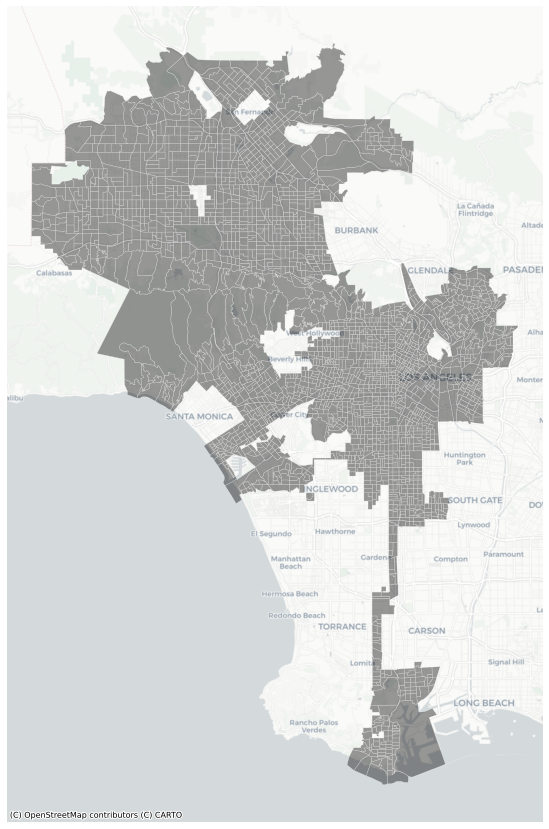

In [ ]:
#plot it
fig, ax=plt.subplots(figsize=(15,15))
gdf.plot(ax=ax,
         color='black',
         edgecolor='white',
         lw=0.5,
         alpha=0.4
)
ax.axis('off') #no axis
# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

results = client.get("amvf-fr72", 
                     limit=50000,
                     where = "arst_date between '2020-07-01T00:00:00' and '2021-01-31T00:00:00'",
                     order='arst_date desc')

# Convert to pandas DataFrame

In [ ]:

# Convert to pandas DataFrame
arrests = pd.DataFrame.from_records(results)

In [ ]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36631 entries, 0 to 36630
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           36631 non-null  object
 1   report_type      36631 non-null  object
 2   arst_date        36631 non-null  object
 3   time             36630 non-null  object
 4   area             36631 non-null  object
 5   area_desc        36631 non-null  object
 6   rd               36631 non-null  object
 7   age              36631 non-null  object
 8   sex_cd           36631 non-null  object
 9   descent_cd       36631 non-null  object
 10  chrg_grp_cd      34105 non-null  object
 11  grp_description  34100 non-null  object
 12  arst_typ_cd      36631 non-null  object
 13  charge           36631 non-null  object
 14  chrg_desc        34105 non-null  object
 15  dispo_desc       34460 non-null  object
 16  location         36631 non-null  object
 17  crsst            19215 non-null

In [ ]:
arrests.head()

,rpt_id,report_type,arst_date,time,area,area_desc,rd,age,sex_cd,descent_cd,...,dispo_desc,location,crsst,lat,lon,location_1,bkg_date,bkg_time,bgk_location,bkg_loc_cd
0,6116629,BOOKING,2021-01-31T00:00:00.000,2015,12,77th Street,1266,27,M,B,...,FELONY COMPLAINT FILED,83RD ST,BROADWAY,33.9642,-118.2783,"{'type': 'Point', 'coordinates': [-118.2783, 3...",2021-01-31T00:00:00.000,2216,77TH ST,4212
1,210905255,RFC,2021-01-31T00:00:00.000,2346,09,Van Nuys,0904,53,M,W,...,MISDEMEANOR COMPLAINT FILED,SEPULVEDA BL,COHASSET,0,0,"{'type': 'Point', 'coordinates': [0, 0]}",NaN,NaN,NaN,NaN
2,6116639,BOOKING,2021-01-31T00:00:00.000,1705,21,Topanga,2136,22,M,H,...,MISDEMEANOR COMPLAINT FILED,SHERMAN WY,ALABAMA,34.201,-118.599,"{'type': 'Point', 'coordinates': [-118.599, 34...",2021-01-31T00:00:00.000,2237,VALLEY - JAIL DIV,4279
3,211905113,RFC,2021-01-31T00:00:00.000,1500,19,Mission,1913,28,F,W,...,MISDEMEANOR COMPLAINT FILED,BLEDSOE,SAN FERNANDO RD,0,0,"{'type': 'Point', 'coordinates': [0, 0]}",NaN,NaN,NaN,NaN
4,210905254,RFC,2021-01-31T00:00:00.000,2247,09,Van Nuys,0904,27,M,H,...,MISDEMEANOR COMPLAINT FILED,SEPULVEDA BL,COHASSET ST,0,0,"{'type': 'Point', 'coordinates': [0, 0]}",NaN,NaN,NaN,NaN


In [ ]:
from shapely import geometry
arrests=gpd.GeoDataFrame(arrests,crs='EPSG:4326',
                         geometry=gpd.points_from_xy(arrests.lon, arrests.lat))

In [ ]:
# get the layers into a web mercator projection
# reproject to web mercator
arrests=arrests.to_crs(epsg=3857)

In [ ]:
# convert lat/lon to floats
arrests.lon=arrests.lon.astype('float')
arrests.lat=arrests.lat.astype('float')

In [ ]:
arrests.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

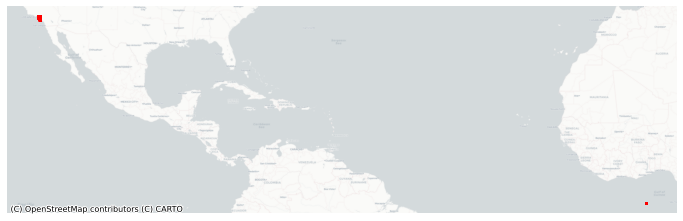

In [ ]:
#map it
fig, ax=plt.subplots(figsize=(12,12))
arrests.plot(ax=ax,
             color='red',
             markersize=1)
ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
# subset the zero coordinate records
arrests[arrests.lon==0]

,rpt_id,report_type,arst_date,time,area,area_desc,rd,age,sex_cd,descent_cd,...,location,crsst,lat,lon,location_1,bkg_date,bkg_time,bgk_location,bkg_loc_cd,geometry
1,210905255,RFC,2021-01-31T00:00:00.000,2346,09,Van Nuys,0904,53,M,W,...,SEPULVEDA BL,COHASSET,0.0,0.0,"{'type': 'Point', 'coordinates': [0, 0]}",NaN,NaN,NaN,NaN,POINT (0.000 0.000)
3,211905113,RFC,2021-01-31T00:00:00.000,1500,19,Mission,1913,28,F,W,...,BLEDSOE,SAN FERNANDO RD,0.0,0.0,"{'type': 'Point', 'coordinates': [0, 0]}",NaN,NaN,NaN,NaN,POINT (0.000 0.000)
4,210905254,RFC,2021-01-31T00:00:00.000,2247,09,Van Nuys,0904,27,M,H,...,SEPULVEDA BL,COHASSET ST,0.0,0.0,"{'type': 'Point', 'coordinates': [0, 0]}",NaN,NaN,NaN,NaN,POINT (0.000 0.000)
5,211105080,RFC,2021-01-31T00:00:00.000,1725,11,Northeast,1177,41,M,H,...,HURON,AVENUE 26,0.0,0.0,"{'type': 'Point', 'coordinates': [0, 0]}",NaN,NaN,NaN,NaN,POINT (0.000 0.000)
8,211105079,RFC,2021-01-31T00:00:00.000,1730,11,Northeast,1177,43,M,H,...,HURON,AVENUE 26,0.0,0.0,"{'type': 'Point', 'coordinates': [0, 0]}",NaN,NaN,NaN,NaN,POINT (0.000 0.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36505,202111263,RFC,2020-07-01T00:00:00.000,1630,21,Topanga,2138,44,M,H,...,SHERMAN WY,MASON AV,0.0,0.0,"{'type': 'Point', 'coordinates': [0, 0]}",NaN,NaN,NaN,NaN,POINT (0.000 0.000)
36538,200212030,RFC,2020-07-01T00:00:00.000,1630,02,Rampart,0237,46,F,W,...,1600 BEVERLY BL,NaN,0.0,0.0,"{'type': 'Point', 'coordinates': [0, 0]}",NaN,NaN,NaN,NaN,POINT (0.000 0.000)
36539,202111265,RFC,2020-07-01T00:00:00.000,0940,21,Topanga,2146,71,M,H,...,SHERMAN WY,CANOGA AV,0.0,0.0,"{'type': 'Point', 'coordinates': [0, 0]}",NaN,NaN,NaN,NaN,POINT (0.000 0.000)
36563,202111264,RFC,2020-07-01T00:00:00.000,1515,21,Topanga,2146,31,M,H,...,7100 REMMET AV,NaN,0.0,0.0,"{'type': 'Point', 'coordinates': [0, 0]}",NaN,NaN,NaN,NaN,POINT (0.000 0.000)


In [ ]:
# drop the unmapped rows
arrests = arrests[arrests.lon!=0]

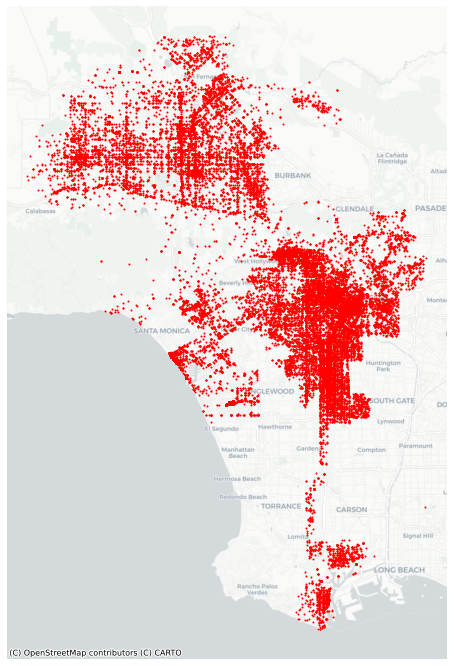

In [ ]:
#map it again
fig, ax=plt.subplots(figsize=(12,12))
arrests.plot(ax=ax,
             color='red',
             markersize=1)
ax.axis('off')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

In [ ]:
#create a two layer map
# get the bounding box for arrests

In [ ]:
minx, miny, maxx, maxy=arrests.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13209304.360918792
3989446.5219156616
-13153165.941711744
4072862.5061257486


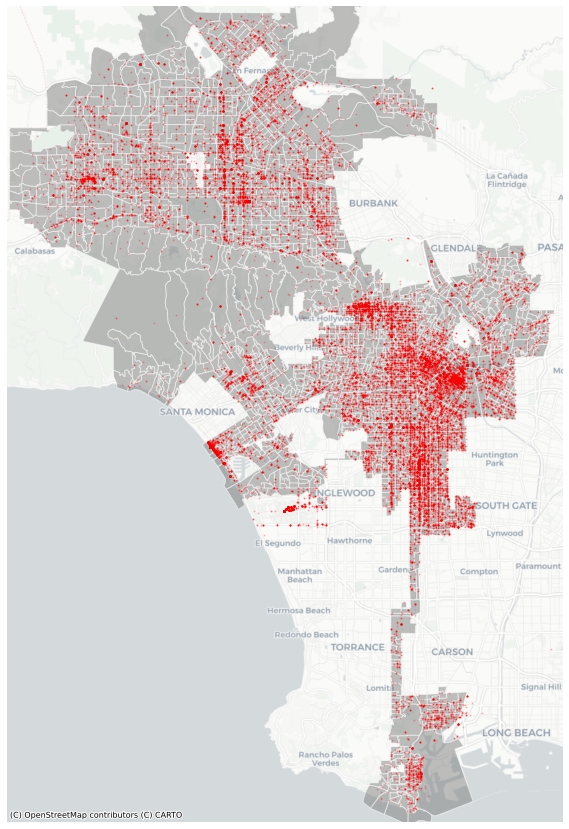

In [ ]:
#sub plot for multilayer maps
fig,ax=plt.subplots(1,1, figsize=(15,15))
gdf.plot(ax=ax,
         color='gray',
         edgecolor='white',
         alpha=0.5
)
arrests.plot(ax=ax,
             color='red',
             markersize=1,
             alpha=0.2)
# use the bounding box coordinates to set the x and y limits
ax.set_xlim(minx-1000,maxx+1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny-1000,maxy+1000)
ax.axis('off')
# add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

In [ ]:
# Do the spatial join
join=gpd.sjoin(arrests, gdf, how='left')
join.head()

,rpt_id,report_type,arst_date,time,area,area_desc,rd,age,sex_cd,descent_cd,...,lon,location_1,bkg_date,bkg_time,bgk_location,bkg_loc_cd,geometry,index_right,FIPS,TotalPopu
0,6116629,BOOKING,2021-01-31T00:00:00.000,2015,12,77th Street,1266,27,M,B,...,-118.2783,"{'type': 'Point', 'coordinates': [-118.2783, 3...",2021-01-31T00:00:00.000,2216,77TH ST,4212,POINT (-13166680.128 4023995.973),1956.0,060372397012,1959.0
2,6116639,BOOKING,2021-01-31T00:00:00.000,1705,21,Topanga,2136,22,M,H,...,-118.5990,"{'type': 'Point', 'coordinates': [-118.599, 34...",2021-01-31T00:00:00.000,2237,VALLEY - JAIL DIV,4279,POINT (-13202380.289 4055823.453),685.0,060371345202,2351.0
6,6116641,BOOKING,2021-01-31T00:00:00.000,1330,06,Hollywood,0645,32,M,H,...,-118.3391,"{'type': 'Point', 'coordinates': [-118.3391, 3...",2021-01-31T00:00:00.000,2243,HOLLYWOOD,4206,POINT (-13173448.353 4042452.596),1000.0,060371901002,1578.0
7,6116331,BOOKING,2021-01-31T00:00:00.000,0200,19,Mission,1917,19,M,B,...,-118.4409,"{'type': 'Point', 'coordinates': [-118.4409, 3...",2021-01-31T00:00:00.000,0828,VALLEY - JAIL DIV,4279,POINT (-13184780.677 4070598.135),110.0,060371064081,2896.0
10,6116168,BOOKING,2021-01-31T00:00:00.000,0005,19,Mission,1918,38,F,H,...,-118.4350,"{'type': 'Point', 'coordinates': [-118.435, 34...",2021-01-31T00:00:00.000,0235,VALLEY - JAIL DIV,4279,POINT (-13184123.892 4069978.208),99.0,060371064031,1141.0


In [ ]:
arrests_by_gdf=join.FIPS.value_counts().rename_axis('FIPS').reset_index(name='arrests_count')

In [ ]:
arrests_by_gdf.head()

,FIPS,arrests_count
0,060372734022,419
1,060371282101,322
2,060372077101,270
3,060372260021,228
4,060372074001,225


In [ ]:
arrests_by_gdf.to_csv('/content/drive/MyDrive/geopandas_exercise/arrests_by_gdf')

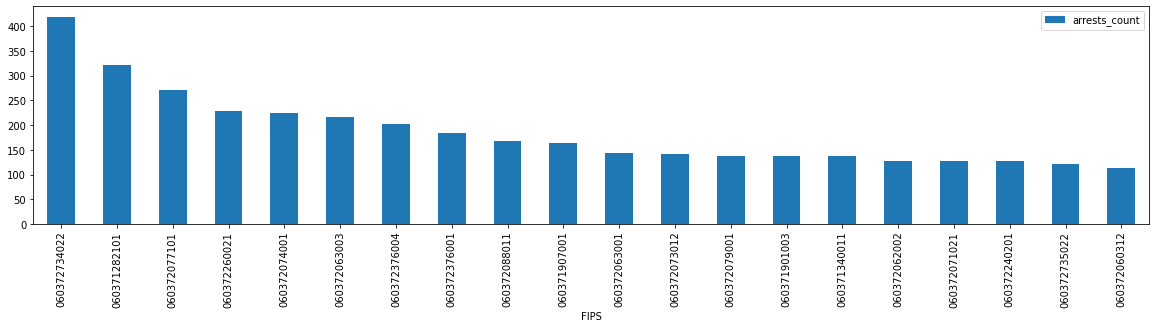

In [ ]:
#bar chart of 20 geographies
arrests_by_gdf[:20].plot.bar(figsize=(20,4),
                             x='FIPS',
                             y='arrests_count')

In [ ]:
# join value counts back to the gdf
gdf=gdf.merge(arrests_by_gdf, on='FIPS')

In [ ]:
gdf.head()

,FIPS,TotalPopu,geometry,arrests_count
0,060371011101,1688.0,"MULTIPOLYGON (((-13168130.287 4063777.973, -13...",2
1,060371011102,1614.0,"MULTIPOLYGON (((-13169350.794 4063591.834, -13...",11
2,060371011221,2156.0,"MULTIPOLYGON (((-13169467.902 4065613.937, -13...",2
3,060371011222,1249.0,"MULTIPOLYGON (((-13168066.056 4064987.278, -13...",1
4,060371012101,3047.0,"MULTIPOLYGON (((-13168465.581 4062734.852, -13...",17


In [ ]:
#normalizing

In [ ]:
gdf.to_csv('/content/drive/MyDrive/geopandas_exercise/gdf.geojson')

In [ ]:
gdf['arrests_per_1000']=gdf['arrests_count']/gdf['TotalPopu']*1000

In [ ]:
gdf.sort_values(by='arrests_per_1000').tail()

,FIPS,TotalPopu,geometry,arrests_count,arrests_per_1000
1787,060372376001,1084.0,"MULTIPOLYGON (((-13167654.841 4026132.403, -13...",184,169.741697
1790,060372376004,924.0,"MULTIPOLYGON (((-13167410.829 4025590.204, -13...",203,219.696970
2335,060379800241,223.0,"MULTIPOLYGON (((-13193418.068 4053521.172, -13...",49,219.730942
2134,060372735022,386.0,"MULTIPOLYGON (((-13189115.569 4026857.882, -13...",121,313.471503
2130,060372734022,680.0,"MULTIPOLYGON (((-13189821.780 4027960.015, -13...",419,616.176471


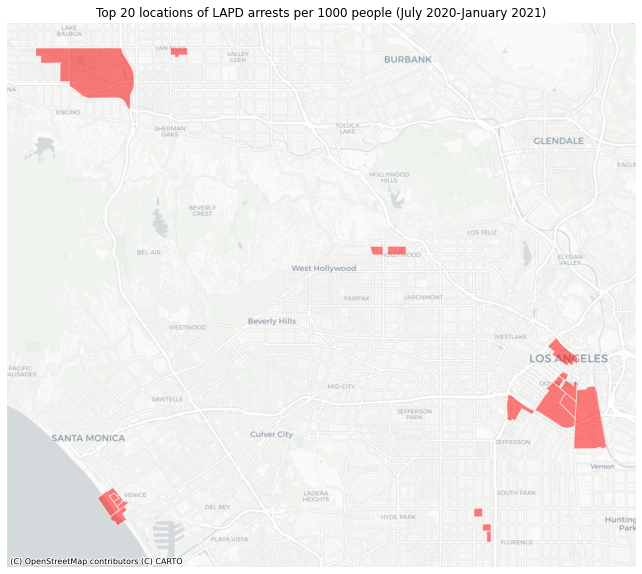

In [ ]:
#map 
fig, ax=plt.subplots(figsize=(12,10))
gdf.sort_values(by='arrests_per_1000', ascending=False)[:20].plot(
    ax=ax,
    color='red',
    edgecolor='white',
    alpha=0.5,
    legend=True
)
#title 
ax.set_title('Top 20 locations of LAPD arrests per 1000 people (July 2020-January 2021)')
ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
#chloropleth maps

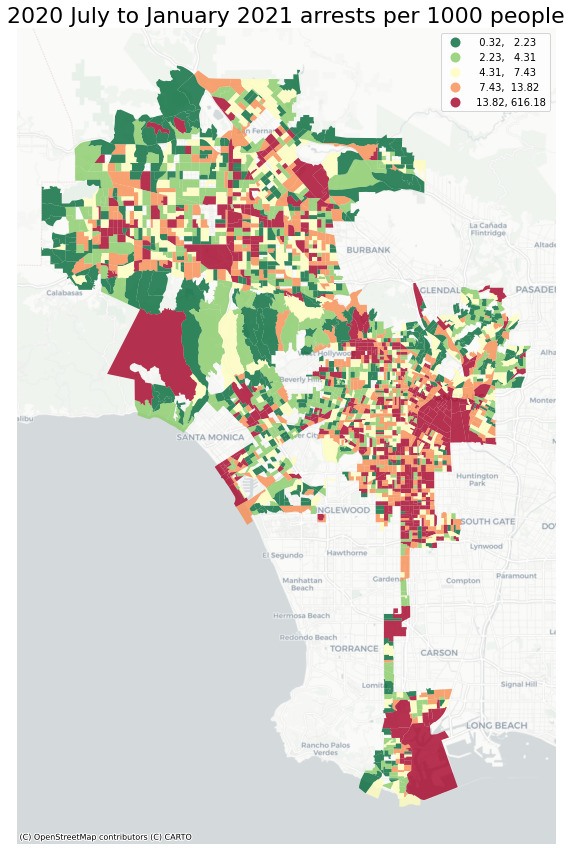

In [ ]:
fig,ax=plt.subplots(figsize=(15,15))
gdf.plot(ax=ax,
         column='arrests_per_1000',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r', # a diverging color scheme
         scheme='quantiles') 
ax.axis('off')
ax.set_title('2020 July to January 2021 arrests per 1000 people', fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Global spatial autocorrelation